# Obligatorisk innlevering 2 - oppgave 1

Denne oppgaven tar for seg et datasett fra Food Mart, som er ennærbutikkjede i USA. Food Mart har i dette datasettet samlet endel data i forbindelse med mediekampanjer. Din oppgave er å forutsi kostnadene for mediekampanjer i matvaremarkedet på grunnlag av funksjonene som tilbys.

In [1]:
# Importer resten av pakkene du trenger her:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett1.csv")
# Her deler jeg datasettet inn i egenskaper (X) og target (y)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
# PS: Ikke endre denne kodecellen!

#### Oppgave 1.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? 

Begrunn svaret

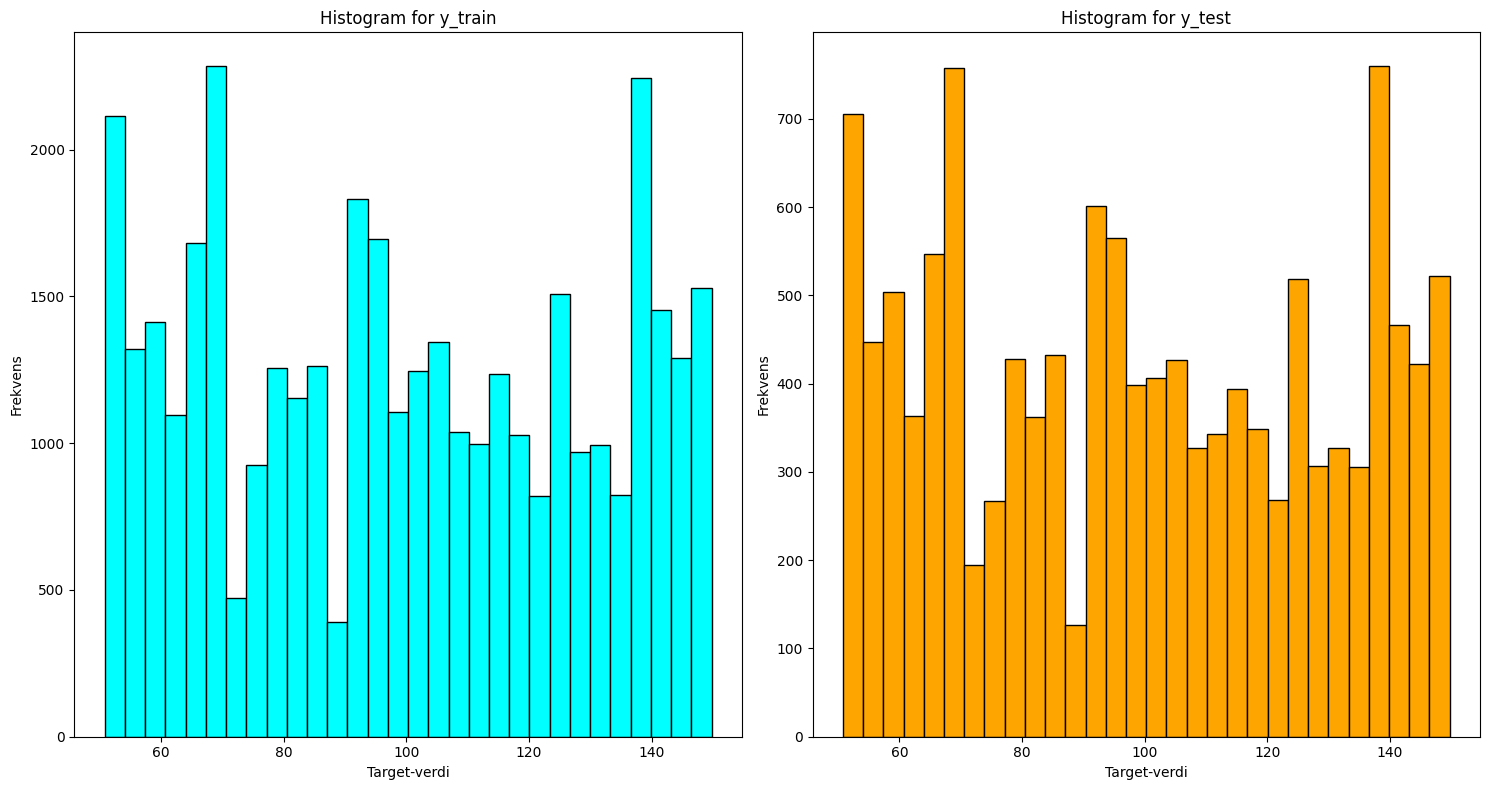

In [56]:
#TODO: visualiser y_train og y_test i et histogram

import matplotlib.pyplot as plt

# Plotter histogrammet til y_train
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30, color='cyan', edgecolor='black')
plt.title("Histogram for y_train")
plt.xlabel("Target-verdi")
plt.ylabel("Frekvens")

# Plotter histogrammet til y_test
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=30, color='orange', edgecolor='black')
plt.title("Histogram for y_test")
plt.xlabel("Target-verdi")
plt.ylabel("Frekvens")

# Visualiserer histogrammet til y_train og y_test
plt.tight_layout()
plt.show()

**Svar:**

Ut ifra histogrammene kan man tyde at det er snakk om kontinuerlige data, ved at verdiene ikke er knyttet opp til kategorier eller enkelte utvalgte verdier.

Stolpene er definert med intervaller, som vil si at verdiene til dataene i hver stolpe ikke nødvendigvis vil være like, kun at de er plassert i den stolpen nærmest verdien til dataen.

For kategoriske og diskrete variabeltyper vil problemene normalt knyttes til klassifisering, der kontinuerlige variabler er mer egnet for regresjonsanalyser.

Med regresjonsanalyser kan man se etter en sammenheng mellom en avhengig variabel, og flere uavhengige variabler, for å kunne predikere verdien til den avhengige variablen.

Siden y-train og y-test er kontinuerlige variabler kan man gå ut ifra at man skal løse et regresjonsproblem.


#### Oppgave 1.2) 

fullfør funksjonen under slik at den tar inn både egenskapene og target, legger disse sammen i samme matrise igjen og visualiser dataene som en korrelasjonsmatrise (poenget er at du skal kunne se hvordan egenskapene korrelerer med target).

* Beskriv hvilke egenskaper du ser korrelerer mest med target

In [57]:
import seaborn as sns

def korrelasjonsmatrise(X,y):
    X_temp = X.copy()
    y_temp = y.copy()
    X_temp["Target"] = y_temp
    #TODO: Fullfør koden
    
    # Beregner korrelasjonsmatrisen
    correlation_matrix = X_temp.corr()

    # Utformer og visualiserer korrelasjonsmatrisen
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Korrelasjonsmatrise av egenskapene og target")
    plt.show()

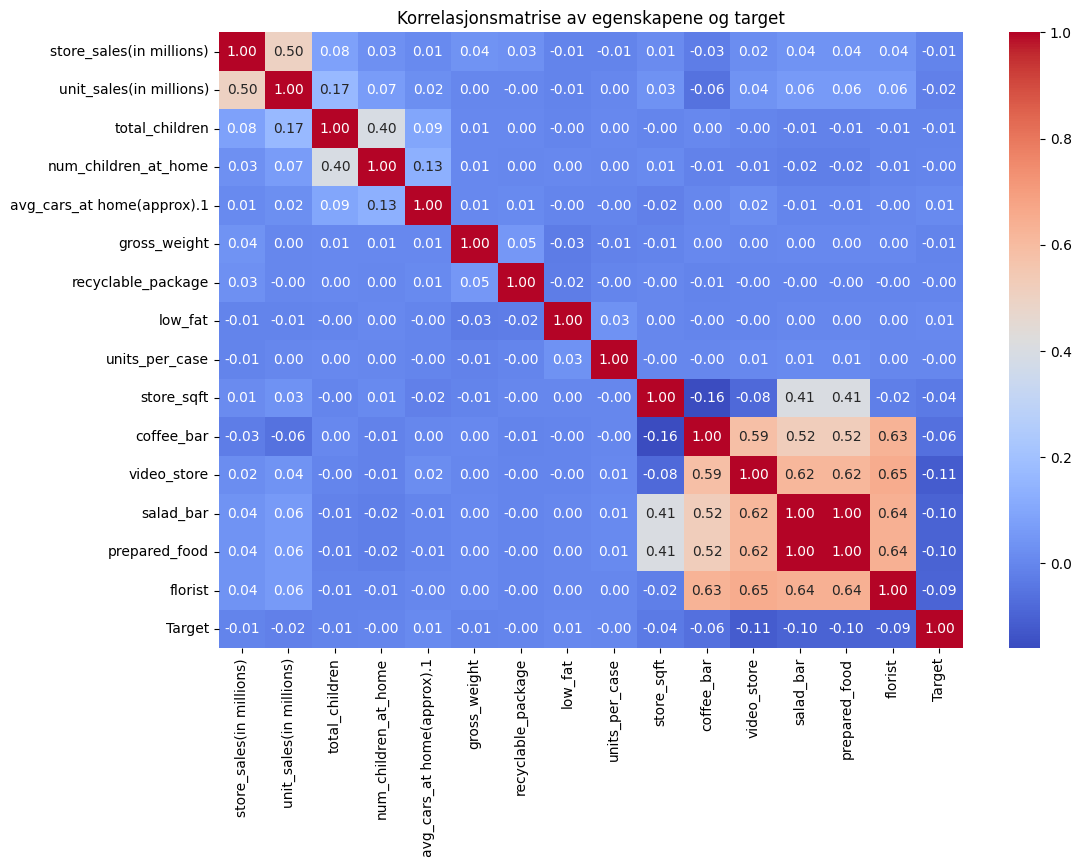

In [58]:
korrelasjonsmatrise(X_train,y_train)

**Svar:**

For å finne ut hvilke egenskaper som korrelerer mest med target må man studere den raden i korrelasjonsmatrisen som er knyttet til target.

Det er raden som er nederst i matrisen, og mans er at det generelt er lave utslag angående korrelasjon mellom target og de andre variablene.


De tre største utslagene er:

video_store:    -0.11

salad_bar:      -0.10

prepared_food:  -0.10


Selv om det kan tyde på en negativ korrelasjon vil det ikke nødvendigvis bety at det finnes kausalitet.

#### Oppgave 1.3) 
Velg en modellarkitektur (gjerne fra Scikit-Learn) og gjør et strukturert hyperparametersøk. 
* Gjør et søk på minst 3 paramtere og minst 2 verdier pr parameter
* Bruk 3-folds kryssvalidering for hver parameterkombinasjon
* Velg en metrikk som passer for målet (tips: "neg_mean_squared_error" i sklearn) 
* Skriv ut den parameterkobinasjonen som ga den beste skåren, samt skåren. Kommenter resultatet

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#TODO: Utfør hyperparametersøk for en modell

# Definerer ulike hyperparametere som tas i bruk i søket
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setter i gang modellen
model = DecisionTreeRegressor(random_state=0)

# Bruker 3-folds kryssvalidering og grid search
grid_search = GridSearchCV(model, param_grid, cv=3, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Printer ut de beste parameterne og scoren
print("Beste parametere:", grid_search.best_params_)
print("Beste score:", grid_search.best_score_)


Beste parametere: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Beste score: -855.874456129783


**Svar:**

I denne oppgaven benyttes modellen Decision Tree Regressor, og hyperparametsøket gjennomføres med grid search.

Det benyttes parameterene max_depth, min_samples_split og min_samples_leaf, der hver parameter har 3 mulige verdier.

Så benyttes 3-folds kryssvalidering, med hjelp fra GridSearchCV, innstilt på cv=3 og derfor 3-fold.

Metrikken neg_mean_squared_error benyttes for å finnne negativ gjennomsnittelig kvadratfeil.

En lav score fra neg_mean_squared_error vil tyde på en god modell, og med et resultat på -855 kan man se at det finnes feilberegning i modellen.

Med neg_mean_squared_error som referanse kan man måle modellen og de valgte parameterne opp mot andre muligheter, og på den måten finne en modell som passer bedre til formålet.

#### Oppgave 1.4) 
Bruk hyperparameterkombinasjonen fra oppgave 1.3 og kryssvalider den modellen på nytt med K >= 5 
* Logg "mean absolute error" og "mean squared error" for hver kryssvalideringsrunde
* Oppgi gjennomsnitt og standardavvik for "mean absolute error" og "mean squared error" etter kryssvalideringen og kommenter resultatet
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i treningsdataene? 

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

#TODO: Utfør kryssvalidering med de optimale parameterene fra forrige oppgave og logg mean_absolute_error og mean_squared_error

# Tar i bruk de beste parameterne fra oppgave 1.3
best_model = DecisionTreeRegressor(**grid_search.best_params_, random_state=0)

# Kryssvalidering
mae_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
mse_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')


In [61]:
#TODO: Beregn gjennomsnitt og standard avvik for mean_absolute_error og mean_squared_error og beregn hvor stor den 
# gjennomsnittlige feilen er i forhold til den gjennomsnittlige prisen for markedskampanjen (target) i prosent

# Beregner gjennomsnitt og standardavvik
mean_mae = -mae_scores.mean()
std_mae = mae_scores.std()
mean_mse = -mse_scores.mean()
std_mse = mse_scores.std()

# Printer gjennomsnitt og standardavvik
print(f"Mean Absolute Error: {mean_mae:.2f} +- {std_mae:.2f}")
print(f"Mean Squared Error: {mean_mse:.2f} +- {std_mse:.2f}")

# Sammenligner gjennomsnittlig feil med gjennomsnittlig pris
average_target_price = y_train.mean()
print(f"Gjennomsnittlig feil delt på gjennomsnittlig pris: {(mean_mae / average_target_price) * 100:.2f}%")

Mean Absolute Error: 25.23 +- 0.18
Mean Squared Error: 854.22 +- 6.52
Gjennomsnittlig feil delt på gjennomsnittlig pris: 25.40%


**Svar:**

Modellen tar i bruk parameterne fra 1.3 og logger både MAE og MSE for hver runde med kryssvalidering.

Gjennomsnittet og standardavviket for MAE og MSE er vist over.

MAE forklarer den gjennomsnittelige avstanden mellom det som er predikert og de faktiske verdiene. I snitt er avstanden 25.23 mellom de to. Et lavt standardavvik på MAE indikerer at feilen er relativt konstant.

MSQ vil i likhet med neg_mean_squared_error være et mål på modellens kvalitet. Det er en verdi man har lyst til å minimere. 

I 1.3 ble neg_mean_squared_error -855.87, og her ble MSE 854.22, som vil si at det ikke ble en stor forbedring. Et lavt standardavvik på MSE indikerer at feilen er relativt konstant.

Gjennomsnittlig feil delt på gjennomsnittlig pris er 25.40%


#### Oppgave 1.5) 
Tren modellen en siste gang på alle treningsdataene og gjør prediksjon på testdataene (bruk de optimale parametrene fra oppgave 1.3)
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i testdataene? 

In [62]:
#TODO: Tren modellen på alle treningsdata og utfør prediksjon på testdataene

# Tren modellen på hele treningssettet
best_model.fit(X_train, y_train)

# Gjør prediksjon på testsettet
y_pred = best_model.predict(X_test)

# Beregn MAE og MSE på testsettet
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)

# Sammenlign gjennomsnittlig feil med gjennomsnittlig faktisk pris
average_test_price = y_test.mean()
print(f"Test MAE: {mae_test:.2f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"Gjennomsnittlig feil i forhold til gjennomsnittlig faktisk pris på testsettet: {(mae_test / average_test_price) * 100:.2f}%")

Test MAE: 25.29
Test MSE: 856.10
Gjennomsnittlig feil i forhold til gjennomsnittlig faktisk pris på testsettet: 25.47%


**Svar:**

Generelt er resultatene fra 1.5 ganske like de fra 1.4, som ikke er unaturlig siden det er brukt samme modell.

Likevel er det nyttig, siden man da kan anta at modellen er jevn selv når man utfører testen på ny data.

Resultatene fra 1.3, 1.4 og 1.5 viser at modellen er jevn, men at den har en stor feilmargin.

Uansett vil resultatene man har oppnådd kunne brukes som en referanse om man enten skal optimalisere parameterne, eller velge en ny modell.